In [1]:
import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

##qtensor imports
# import qtensor
# from qtensor import QAOA_energy
# from qtensor import parameter_optimization as popt
# import torch

In [2]:
file3 = open("New110Distinct20NodeRandomGraphs.txt")
mat_list = np.loadtxt(file3).reshape(110,20,20)
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list
g_list = mats_to_graphs(mat_list)
graphs = g_list

In [3]:
datas = [[],[],[],[]]
for i in range(1,6,1):
    resi = []
    
    file = open('Similarity110DistinctSep19Pt'+str(i)+'.txt', 'r', newline = '')
    resi = (np.loadtxt(file).reshape(4,2420)).tolist()
    print(len(resi))
    for j in range(4):
        for k in resi[j]:
            datas[j].append(float(k))
            
a = datas[2]
b= datas[3]

4
4
4
4
4


In [4]:
graphs = g_list

In [5]:
def even_percent(graph):
  """
  Determines the relative percent of even degree nodes
  """
  nodes = graph.number_of_nodes()
  tot_ev = 0
  for i in range(nodes):
    if graph.degree[i]%2 == 0:
      tot_ev+=1
  return tot_ev/nodes

ev_deg_dict ={}
n = len(graphs)
for i in range(n):
  ev_deg_dict[i] = even_percent(graphs[i])

In [6]:
ev_deg_dict

{0: 0.0,
 1: 0.1,
 2: 0.2,
 3: 0.3,
 4: 0.4,
 5: 0.5,
 6: 0.6,
 7: 0.7,
 8: 0.8,
 9: 0.9,
 10: 1.0,
 11: 0.0,
 12: 0.1,
 13: 0.2,
 14: 0.3,
 15: 0.4,
 16: 0.5,
 17: 0.6,
 18: 0.7,
 19: 0.8,
 20: 0.9,
 21: 1.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.1,
 31: 0.1,
 32: 0.1,
 33: 0.1,
 34: 0.1,
 35: 0.1,
 36: 0.1,
 37: 0.1,
 38: 0.2,
 39: 0.2,
 40: 0.2,
 41: 0.2,
 42: 0.2,
 43: 0.2,
 44: 0.2,
 45: 0.2,
 46: 0.3,
 47: 0.3,
 48: 0.3,
 49: 0.3,
 50: 0.3,
 51: 0.3,
 52: 0.3,
 53: 0.3,
 54: 0.4,
 55: 0.4,
 56: 0.4,
 57: 0.4,
 58: 0.4,
 59: 0.4,
 60: 0.4,
 61: 0.4,
 62: 0.5,
 63: 0.5,
 64: 0.5,
 65: 0.5,
 66: 0.5,
 67: 0.5,
 68: 0.5,
 69: 0.5,
 70: 0.6,
 71: 0.6,
 72: 0.6,
 73: 0.6,
 74: 0.6,
 75: 0.6,
 76: 0.6,
 77: 0.6,
 78: 0.7,
 79: 0.7,
 80: 0.7,
 81: 0.7,
 82: 0.7,
 83: 0.7,
 84: 0.7,
 85: 0.7,
 86: 0.8,
 87: 0.8,
 88: 0.8,
 89: 0.8,
 90: 0.8,
 91: 0.8,
 92: 0.8,
 93: 0.8,
 94: 0.9,
 95: 0.9,
 96: 0.9,
 97: 0.9,
 98: 0.9,
 99: 0.9,
 100: 0.9,

# Here lies the computation of metric

In [10]:
sim_metric = []
lowest_av_trans = 0.7186 #from subgraph similarity metric data
for i in range(len(g_list)):
    for j in range(len(g_list)):
        s = 1-(1-lowest_av_trans)*(abs(ev_deg_dict[i] - ev_deg_dict[j]))
        sim_metric.append(s)

In [11]:
from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize

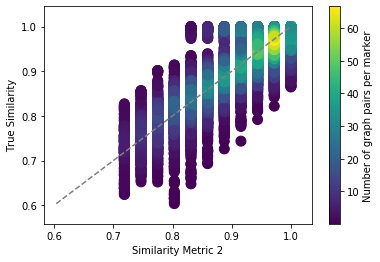

In [17]:
fig , ax = plt.subplots()
# Generate fake data
x__ = sim_metric
y__ = a

# Calculate the point density
xy = np.vstack([x__,y__])
z = gaussian_kde(xy)(xy)

#fig, ax = plt.subplots()
ax.scatter(x__, y__, c=z, s=100)
#plt.colorbar()
# cbar = plt.colorbar(label = "Number of graph pairs per marker")



norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Number of graph pairs per marker')

######################
low = min(x__+y__)
ax.plot([low, 1], [low, 1], color = 'gray', linestyle = '--')

#####################
ax.set_ylabel("True Similarity")#, fontsize = 20)
ax.set_xlabel("Similarity Metric 2")#, fontsize = 20)
fig.savefig("fig_SimilarityMetric2.pdf", dpi = 1000)

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x__,y__)
print(mse)

0.002349656442128564


In [19]:
np.corrcoef(x__,y__)

array([[1.        , 0.79627758],
       [0.79627758, 1.        ]])

# Parity Plot

In [20]:
import numpy as np
matrix = np.zeros((11,11,1000))
pointer_matrix = np.zeros((11,11))
full_g_list = g_list
#############################################
n_graphs = len(full_g_list)
for i in range(110):
  for j in range(110):
    don = even_percent(full_g_list[i])
    don_ind = int((don*10))
    acc = even_percent(full_g_list[j])
    acc_ind = int((acc*10))
    a_sim = sim_metric[i*110 +j]
    if a_sim is float(np.NAN):
        continue

    pointer = int(pointer_matrix[don_ind][acc_ind])
    #pointer = int(pointer)
    # print('#####')
    # print(don)
    # print(acc)
    # print(don_ind)
    # print(acc_ind)
    # print(pointer)
    #print(pointer_matrix[don_ind][acc_ind])
    matrix[don_ind][acc_ind][pointer] = a_sim
    pointer_matrix[don_ind][acc_ind] = pointer + 1    
##################################################
new_matrix = np.zeros((11,11))
for i in range(11):
  for j in range(11):
    terms = []
    for k in range(int(pointer_matrix[i][j])):
      terms.append(matrix[i][j][k])
    new_matrix[11-j-1][i] = np.mean(terms)

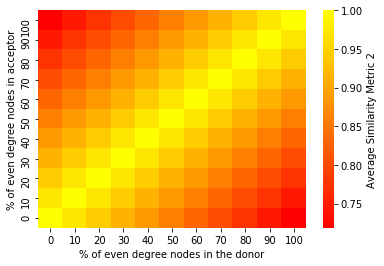

In [22]:
fig, ax = plt.subplots()
df = DataFrame(new_matrix)  #, index=Index, columns=Cols)
# plt.vlines(grid_lines, 0, n)
# plt.hlines(grid_lines, 0, n)

ax = sns.heatmap(df, annot=False, cmap="autumn",xticklabels = [str(i) for i in range(0,110,10)], yticklabels= [str(100-i) for i in range(0,110,10)], cbar_kws={'label': 'Average Similarity Metric 2'})
plt.xlabel("% of even degree nodes in the donor")
plt.ylabel("% of even degree nodes in acceptor")
#ax.tick_params(left=False, bottom=False) 
plt.show()
fig.savefig("fig_SimilarityMetric2_parity.pdf", dpi = 1000)